# Make a simulated light curve to test ride the TRICYCLE!

In [1]:
%matplotlib inline  
import matplotlib.pylab as plt
import numpy as np

In [3]:
exptime = 30.0 / 60.0 / 24.0 # 30min cadence
time = np.arange(0, 100, exptime) # 100 day light curve

In [39]:
# define the 3 periods to recover

p_orb = 7.07 # orbital period of 2 stars
t_0 = min(time) + p_orb/3. # midpoint of 1st eclipse
e_dur = 0.5 # eclipse duration

p_rot1 = 1.51
p_rot2 = 0.80

amp_e = 0.5
amp_1 = 0.03
amp_2 = 0.02

In [40]:
# make the starspot signals
f_1 = -amp_1 * np.sin(time * (2*np.pi) / p_rot1)
f_2 = -amp_2 * np.sin(time * (2*np.pi) / p_rot2)

(0, 30)

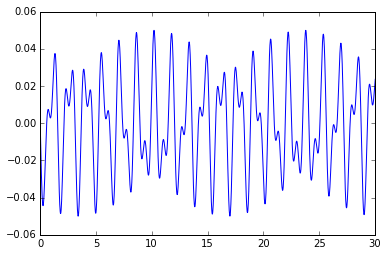

In [41]:
plt.plot(time, f_1+f_2)
plt.xlim(0,30)

In [42]:
# now add the eclipse signal as a step function
in_e = np.where( (((time - t_0) % p_orb)/p_orb < (e_dur/p_orb)) )

f_e = np.zeros_like(time)
f_e[in_e] = -amp_e

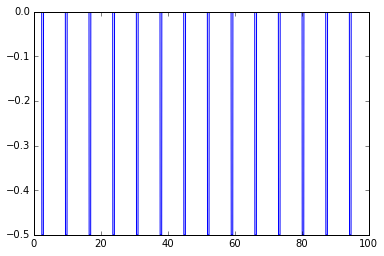

In [43]:
plt.plot(time, f_e)

In [54]:
# now put the 3 components together!

sig = 0.02 # 0.5% flux errors
noise = np.random.random(len(time)) * sig

flux = 1 + f_e + f_1 + f_2 + noise

(0, 10)

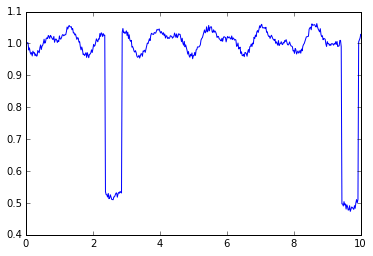

In [55]:
# plot the simulated light curve!

plt.plot(time, flux)
plt.xlim(0,10)

In [58]:
# dump the output light curve to a file!
file = open("test_lc_1.txt", "w")
for i in range(len(time)):
    file.write(str(time[i]) + " " + str(flux[i]) + "\n")
file.close()